Sean Kelly
10/26/20
HW 13

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from numpy import random

Random Binary String:  [1, 0, 1, 0, 1, 1, 1, 1, 0, 1]


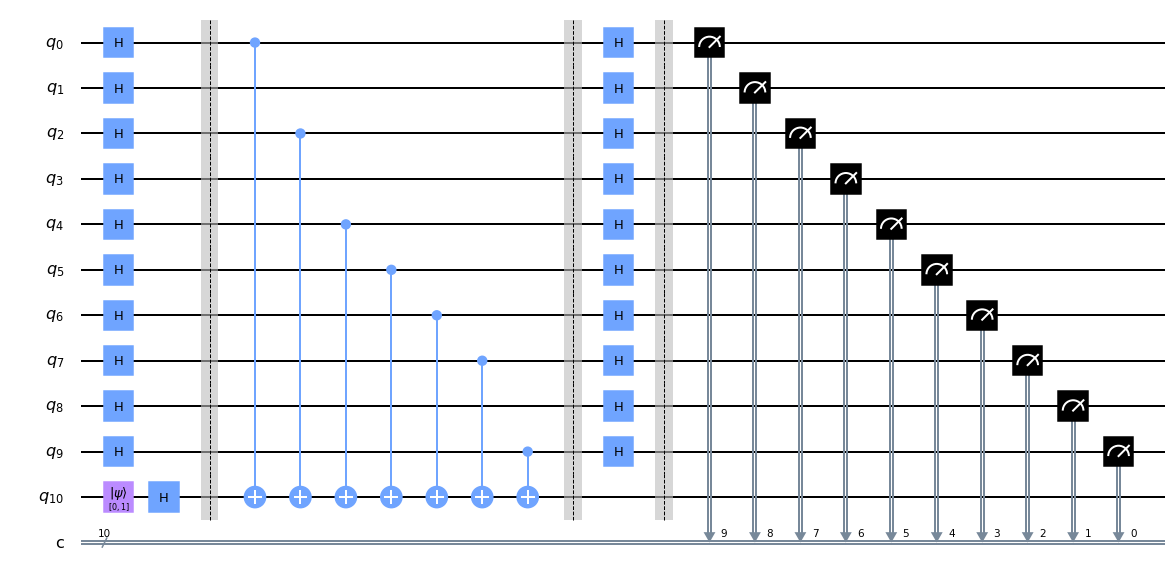

In [6]:
n = 10

circ = QuantumCircuit(n+1,n) #1 qubit circuit

s = []
for i in range(n):
    s.append(random.randint(0,2))
print("Random Binary String: ", s)

circ.initialize([0,1],n) #initializes work qubit to the 1 state

for i in range(n+1):
    circ.h(i) #adds h gate on the i'th qubit
    
circ.barrier() #Begin Unitary Function
    
for i in range(len(s)):
    if s[i] == 1:
        circ.cx(i,n) #adds CNOT gate on the i'th qubit to the target qubit
        
circ.barrier() #End Unitary Function

for i in range(n):
    circ.h(i) #adds h gate on the i'th qubit
    
circ.barrier() #Make a measurement
    
for i in range(n):
    circ.measure(i,n-i-1)
    
circ.draw('mpl')

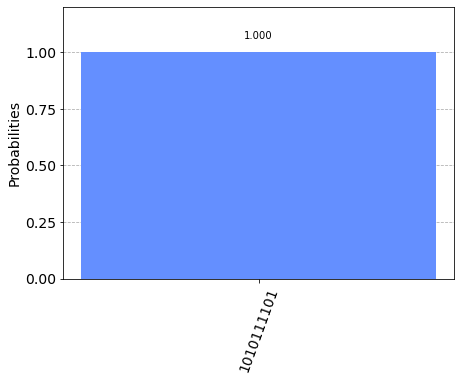

In [7]:
sim = Aer.get_backend('qasm_simulator')
res = execute(circ, sim, shots = 1000).result()
plot_histogram(res.get_counts())